In [1]:
# https://www.kaggle.com/c/titanic/overview
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv', index_col='PassengerId')
data_test = pd.read_csv('test.csv', index_col='PassengerId')

In [3]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
#удаление ненужных колонок
#Удалим признак Cabin, так как большая часть его значений неизвестна
#Предположим, что признаки  Name и Ticket не содержат важной информации. Удалим их
useless_columns = ['Name', 'Ticket', 'Cabin']

data_train_clean = data_train.drop(columns=useless_columns)
data_test_clean = data_test.drop(columns=useless_columns)
data_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [7]:
#заполнение пропущенных данных
def impute_data(df):    
    df_copy = df.copy()
    
    #для категориальных
    categorial_vars = df_copy.select_dtypes(include=['object']).columns.values
    for col in categorial_vars:        
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True) 
    
    #для количественных
    numerical_vars = df_copy.select_dtypes(include=['int64', 'float64']).columns.values
    for col in numerical_vars:        
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace=True)
            
    return df_copy

In [8]:
data_train_full = impute_data(data_train_clean)
data_test_full = impute_data(data_test_clean)

In [9]:
data_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [10]:
data_test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [11]:
#функция для записи ответа в файл
def make_prediction_file(prediction, test_data, name):    
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived": prediction})  
    result.to_csv(name, index=False)

In [12]:
data_train_full_encoder = pd.get_dummies(data_train_full, drop_first = True)
data_test_full_encoder = pd.get_dummies(data_test_full, drop_first = True)
data_train_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [13]:
X = data_train_full_encoder.drop(['Survived'], axis = 1)
y = data_train_full_encoder['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1
4,1,35.0,1,0,53.1000,0,0,1
5,3,35.0,0,0,8.0500,1,0,1


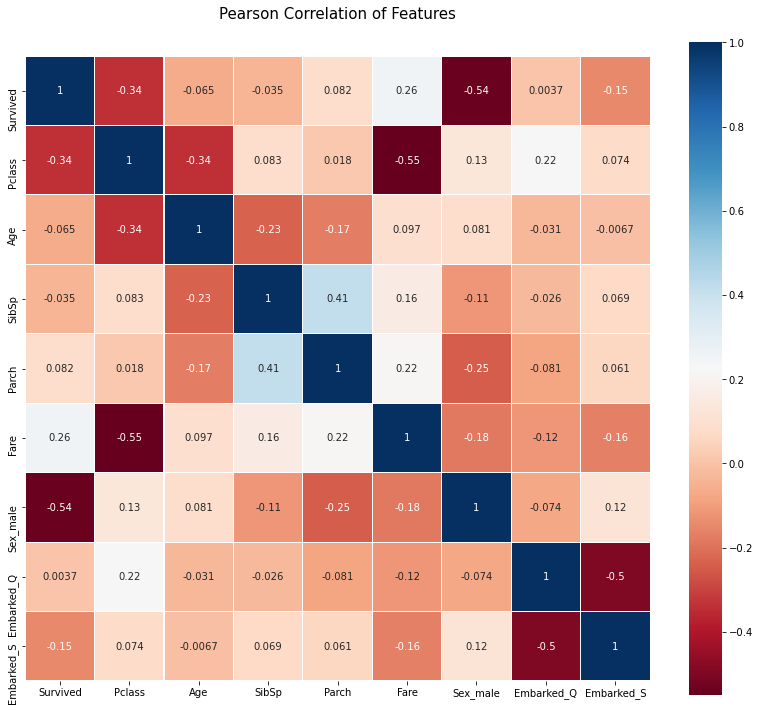

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_train_full_encoder.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

На графике видно, что значительных корреляций между признаками нет
Если была бы сильная корреляция, то можно было бы применить регуляризацию

Обучаем модель на тестовой выборке и смотрим точность алгоритма на тестовой выборке

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pre = clf.predict(X_test)
accuracy_score(np.array(y_test), np.array(pre))

0.7982062780269058

Теперь обучаем модель на всей выборке

In [16]:
clf.fit(X, y)
predRFC = clf.predict(data_test_full_encoder)
make_prediction_file(predRFC, data_test, 'prediction/RandomForestClassifier.csv')

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

parameters = {
              'criterion': ['entropy', 'gini'],
              'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'min_samples_leaf': range(1, 10)
             }

grid_cv = GridSearchCV(clf, parameters, cv=5)
grid_cv.fit(X, y)
grid_pred = grid_cv.best_estimator_.predict(data_test_full_encoder)
make_prediction_file(grid_pred, data_test, 'prediction/GridSearchCV.csv')
grid_cv.best_score_

0.8316678174628084

## Kaggle
#### RandomForestClassifier - bestScore - 0.75598
#### GridSearchCV - bestScore - 0.76076